In [3]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from scipy.stats import stats
from utils.gray2ndvi import gray2ndvi, threshold
sns.set(style="whitegrid", color_codes=True)
plt.rcParams['figure.figsize'] = (12, 8)

In [4]:
MIN_NDVI = 0.178432
MAX_NDVI = 0.368569

In [9]:
spad = pd.read_csv("../data/Chlorophyll/Orange_Chlorophyll.csv", header=None).as_matrix()

In [11]:
spad.shape

(14, 8)

In [81]:
rows, cols = 8, 3
path = "../data/UAV/orange1"

# 160x160 is the image dimension
endvi = np.zeros((rows, cols, 160, 160))

for i in range(rows):
    for j in range(cols):
        filename = path + "/{}{}.png".format(j+1, chr(i+65))
        try:
            img = cv2.imread(filename)
            gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            gray_img = cv2.resize(gray_img, (160, 160))
            endvi[i, j] = gray2ndvi(gray_img, MIN_NDVI, MAX_NDVI)
            endvi[i, j] = threshold(endvi[i, j], MIN_NDVI, MAX_NDVI)
        except:
            endvi[i, j] = np.nan

In [82]:
endvi_mean = np.zeros((rows, cols))

for i in range(rows):
    for j in range(cols):
        endvi_mean[i, j] = np.nanmean(endvi[i, j])

In [83]:
endvi_mean[0, 0]

0.33490705474047566

In [84]:
endvi_mean = endvi_mean.flatten("F")
endvi_mean = endvi_mean[~np.isnan(endvi_mean)]
endvi_mean

array([ 0.33490705,  0.32639327,  0.32530164,  0.33234782,  0.32851721,
        0.31904888,  0.30175293,  0.30014589,  0.33799363,  0.32851576,
        0.33660884,  0.34271504,  0.34299348,  0.3243784 ,  0.29834162,
        0.29434938,  0.34093913,  0.33380244,  0.33162118,  0.33576664,
        0.3298913 ,  0.32565457,  0.29850008,  0.29794325])

In [85]:
stats.pearsonr(endvi_mean, spad[0:3].flatten())

(0.22281878608276012, 0.29531102971688877)

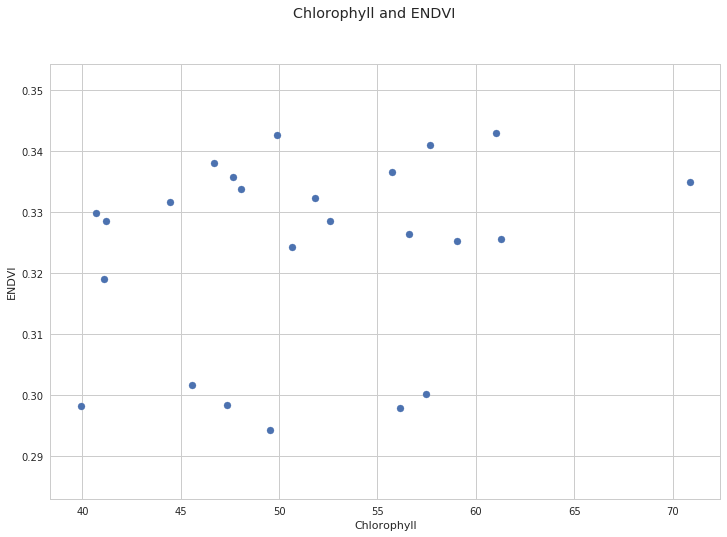

In [55]:
fig = plt.figure()
plt.scatter(spad[0:3].flatten(), endvi_mean)
fig.suptitle("Chlorophyll and ENDVI")
plt.ylabel("ENDVI")
plt.xlabel("Chlorophyll")